In [1]:
!nvidia-smi

Tue May 27 15:14:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


(Dataset)[https://universe.roboflow.com/brain-tumor-detection-b2faq/mri-tumor-detection-ampnm/dataset/2/download]

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QPnypz6jTqSK3sauF1hK")
project = rf.workspace("brain-tumor-detection-b2faq").project("mri-tumor-detection-ampnm")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MRI-Tumor-Detection-2 in yolov12:: 100%|██████████| 2550/2550 [00:00<00:00, 10619.09it/s]



image 1/1 /content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg: 640x640 (no detections), 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


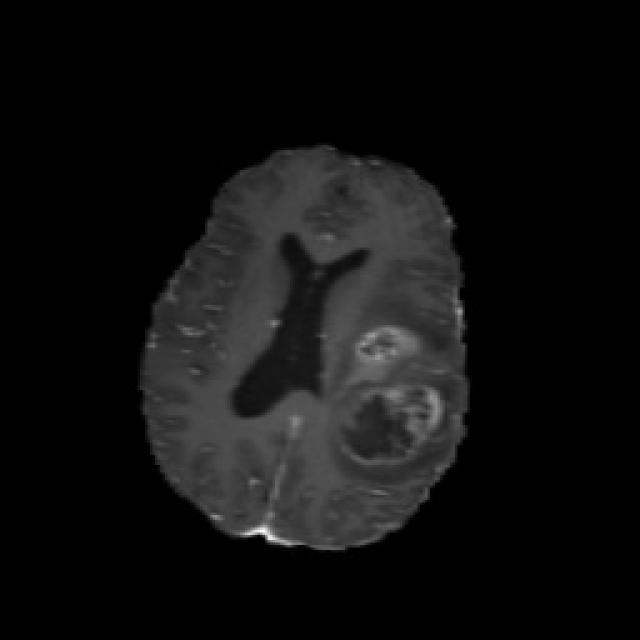

In [49]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo12n.pt")
result = model("/content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg", conf=0.25, save=True)
result[0].show()

In [10]:
!pip install ruamel.yaml

In [12]:

import sys
import ruamel.yaml

yaml = ruamel.yaml.YAML()


with open('/content/MRI-Tumor-Detection-2/data.yaml') as fp:
  data = yaml.load(fp)
  # Correct the paths to the image directories
  data['train'] = "/content/MRI-Tumor-Detection-2/train/images"
  data['test'] = "/content/MRI-Tumor-Detection-2/test/images"
  data['val'] = "/content/MRI-Tumor-Detection-2/valid/images"

  print(data['train'])
  print(data['test'])
  print(data['val'])

  # save the files
  with open('data.yaml', 'w') as fp :
    yaml.dump(data, fp)

/content/MRI-Tumor-Detection-2/train/images
/content/MRI-Tumor-Detection-2/test/images
/content/MRI-Tumor-Detection-2/valid/images


In [13]:
model = YOLO('yolo12n.pt')

results = model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fals

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

YOLOv12n summary: 272 layers, 2,568,243 parameters, 2,568,227 gradients, 6.5 GFLOPs

Transferred 640/691 items from pretrained weights
Freezing layer 'model.21.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 640.2±206.6 MB/s, size: 22.5 KB)


train: Scanning /content/MRI-Tumor-Detection-2/train/labels... 957 images, 0 backgrounds, 0 corrupt: 100%|██████████| 957/957 [00:00<00:00, 2234.13it/s]

train: New cache created: /content/MRI-Tumor-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 237.1±90.9 MB/s, size: 18.0 KB)


val: Scanning /content/MRI-Tumor-Detection-2/valid/labels... 189 images, 0 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<00:00, 1086.18it/s]

val: New cache created: /content/MRI-Tumor-Detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.23G      1.625      2.966       1.52         25        640: 100%|██████████| 60/60 [00:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        189        191          1     0.0881      0.354       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.63G       1.58      2.047      1.471         24        640: 100%|██████████| 60/60 [00:20<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

                   all        189        191      0.618      0.497      0.538      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.64G      1.644      1.748       1.51         16        640: 100%|██████████| 60/60 [00:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        189        191      0.796      0.607      0.699      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.66G      1.607       1.56      1.496         23        640: 100%|██████████| 60/60 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        189        191      0.404      0.287      0.198     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.67G      1.561      1.418      1.463         21        640: 100%|██████████| 60/60 [00:19<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        189        191      0.736      0.665       0.66       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.69G      1.537      1.259      1.443         22        640: 100%|██████████| 60/60 [00:18<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]

                   all        189        191       0.85       0.77      0.838      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.7G      1.524      1.209      1.422         24        640: 100%|██████████| 60/60 [00:19<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        189        191      0.862      0.754      0.838      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.72G      1.489       1.13      1.388         18        640: 100%|██████████| 60/60 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        189        191      0.795      0.688      0.735      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.73G       1.51      1.074      1.403         19        640: 100%|██████████| 60/60 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        189        191      0.873      0.759      0.874       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.75G      1.482      1.096       1.39         18        640: 100%|██████████| 60/60 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        189        191      0.835      0.759      0.809      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.76G      1.455      1.074      1.406         18        640: 100%|██████████| 60/60 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        189        191      0.849      0.736      0.853      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.78G      1.401      1.037      1.352         24        640: 100%|██████████| 60/60 [00:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        189        191      0.898      0.832      0.896      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.79G      1.422     0.9782      1.364         20        640: 100%|██████████| 60/60 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        189        191        0.8      0.773      0.855      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.8G      1.421     0.9746      1.361         22        640: 100%|██████████| 60/60 [00:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]

                   all        189        191      0.856      0.713      0.813      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.82G      1.396     0.9629      1.338         21        640: 100%|██████████| 60/60 [00:19<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all        189        191      0.913      0.733      0.838      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.83G      1.415     0.9557       1.35         25        640: 100%|██████████| 60/60 [00:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]

                   all        189        191      0.865      0.736      0.832      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.85G      1.378     0.9204       1.33         19        640: 100%|██████████| 60/60 [00:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        189        191      0.872      0.812      0.875      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.86G      1.402     0.8912      1.343         28        640: 100%|██████████| 60/60 [00:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        189        191      0.871      0.816      0.858      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.88G      1.328     0.9145      1.323         19        640: 100%|██████████| 60/60 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        189        191      0.839      0.845        0.9      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.89G      1.372     0.9031      1.325         30        640: 100%|██████████| 60/60 [00:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        189        191      0.881      0.806      0.878      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.91G      1.355      0.873      1.304         21        640: 100%|██████████| 60/60 [00:18<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.58it/s]

                   all        189        191      0.859      0.829      0.895      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.92G      1.343     0.8278      1.312         23        640: 100%|██████████| 60/60 [00:19<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]

                   all        189        191      0.843      0.859      0.903      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.94G      1.338     0.8389      1.312         12        640: 100%|██████████| 60/60 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        189        191      0.898      0.828      0.885      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.95G      1.323     0.8511      1.294         19        640: 100%|██████████| 60/60 [00:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        189        191      0.868      0.812       0.88      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.97G      1.368     0.8521      1.306         19        640: 100%|██████████| 60/60 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]

                   all        189        191      0.904      0.848      0.899      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.98G      1.318     0.8036      1.289         23        640: 100%|██████████| 60/60 [00:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all        189        191      0.882      0.848      0.898      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         4G      1.296     0.8052      1.273         22        640: 100%|██████████| 60/60 [00:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        189        191      0.817      0.895      0.891      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.01G      1.282     0.7558      1.287         25        640: 100%|██████████| 60/60 [00:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        189        191      0.851      0.864      0.896      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G      1.289     0.7821      1.275         16        640: 100%|██████████| 60/60 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]

                   all        189        191      0.923      0.853      0.928      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.04G      1.269     0.7876      1.271         23        640: 100%|██████████| 60/60 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all        189        191      0.898      0.817      0.898      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.05G      1.254     0.7517      1.254         16        640: 100%|██████████| 60/60 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        189        191      0.885      0.883      0.921      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.07G      1.263     0.7322      1.269         20        640: 100%|██████████| 60/60 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all        189        191      0.905      0.901      0.941       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.09G      1.274     0.7378      1.254         25        640: 100%|██████████| 60/60 [00:19<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all        189        191      0.904      0.859      0.918      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.1G      1.243     0.7256      1.252         19        640: 100%|██████████| 60/60 [00:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        189        191      0.896      0.907      0.931      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.12G      1.241      0.746      1.256         26        640: 100%|██████████| 60/60 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.58it/s]

                   all        189        191      0.906      0.907      0.936      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.13G      1.236     0.7511       1.25         23        640: 100%|██████████| 60/60 [00:19<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all        189        191      0.936      0.838      0.922      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.14G      1.243     0.7194      1.244         28        640: 100%|██████████| 60/60 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        189        191      0.918      0.885      0.934      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.16G      1.203     0.7158      1.217         22        640: 100%|██████████| 60/60 [00:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        189        191      0.931      0.852      0.906      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.17G      1.177     0.6813      1.218         21        640: 100%|██████████| 60/60 [00:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        189        191      0.917      0.869       0.92      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.19G      1.188     0.6783      1.219         19        640: 100%|██████████| 60/60 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        189        191      0.918      0.881      0.936      0.601


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.21G      1.176     0.6311      1.262         13        640: 100%|██████████| 60/60 [00:20<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all        189        191      0.939      0.886      0.948       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.22G      1.112     0.5818      1.235         13        640: 100%|██████████| 60/60 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]

                   all        189        191      0.926      0.914      0.953       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.23G      1.125     0.5769      1.236         13        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all        189        191      0.931      0.912      0.951      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.25G      1.092     0.5427      1.223         13        640: 100%|██████████| 60/60 [00:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]

                   all        189        191      0.936      0.916       0.95      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.26G      1.103     0.5419      1.214         13        640: 100%|██████████| 60/60 [00:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]

                   all        189        191      0.933      0.921       0.95      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.28G      1.087     0.5376      1.203         13        640: 100%|██████████| 60/60 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        189        191      0.946      0.913      0.953      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.29G      1.074     0.5223      1.201         13        640: 100%|██████████| 60/60 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        189        191      0.947      0.927       0.96      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.31G      1.066     0.5204       1.19         14        640: 100%|██████████| 60/60 [00:17<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        189        191      0.952      0.925      0.962      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.32G      1.058       0.51      1.198         13        640: 100%|██████████| 60/60 [00:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        189        191      0.951      0.921      0.963      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.34G      1.041     0.5089      1.184         13        640: 100%|██████████| 60/60 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        189        191      0.945      0.916      0.957      0.658



50 epochs completed in 0.295 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]


                   all        189        191      0.946      0.921      0.963      0.664
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/train


In [14]:
odel = YOLO('yolo12n.pt')
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Validate the model
metrics = model.val()

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 590.1±246.3 MB/s, size: 17.3 KB)


val: Scanning /content/MRI-Tumor-Detection-2/valid/labels.cache... 189 images, 0 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]


                   all        189        191      0.951      0.921      0.963      0.664
Speed: 2.4ms preprocess, 7.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg: 640x640 2 Tumors, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


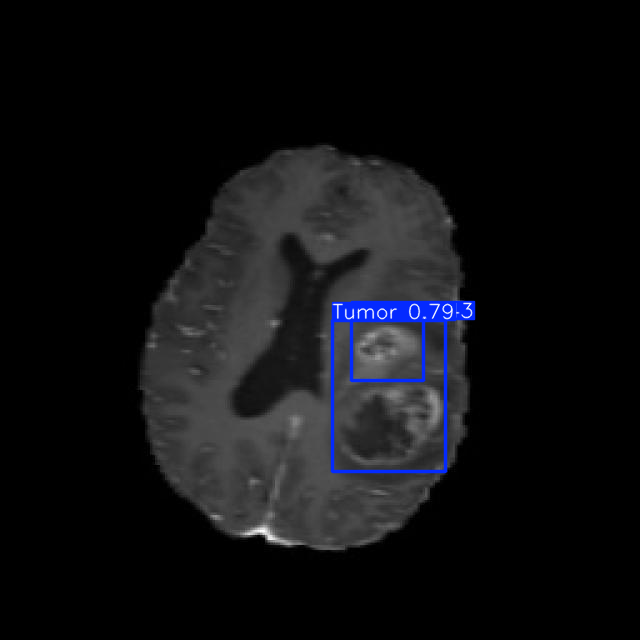

In [15]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/train/images/00018_101_jpg.rf.a68e0f1742c774b87c41680378e2a1b3.jpg', conf=0.25, save=True)
result[0].show()

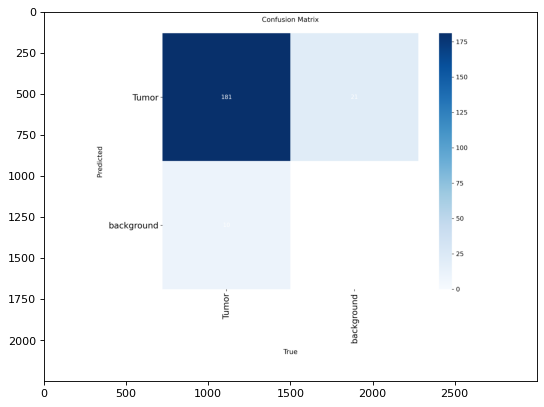

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/confusion_matrix.png'))

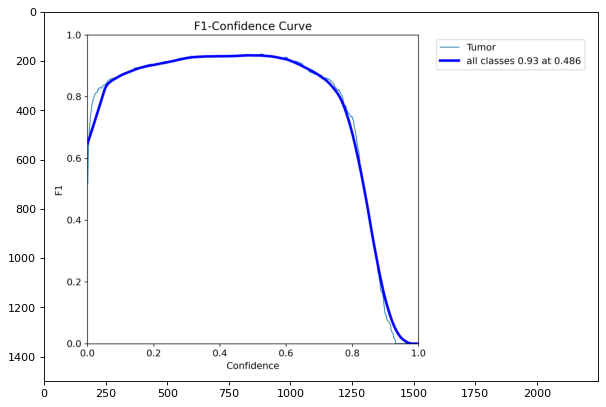

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/F1_curve.png'))

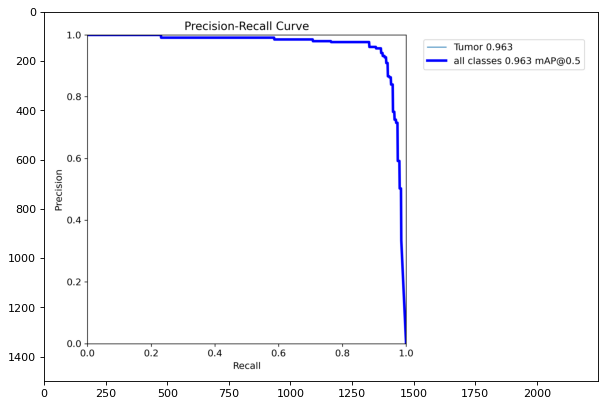

In [22]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/PR_curve.png'))

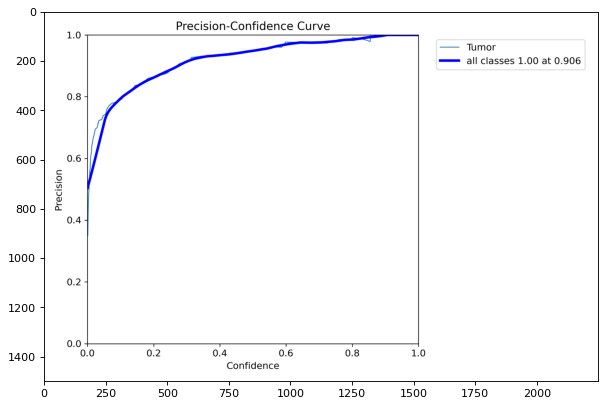

In [23]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/P_curve.png'))

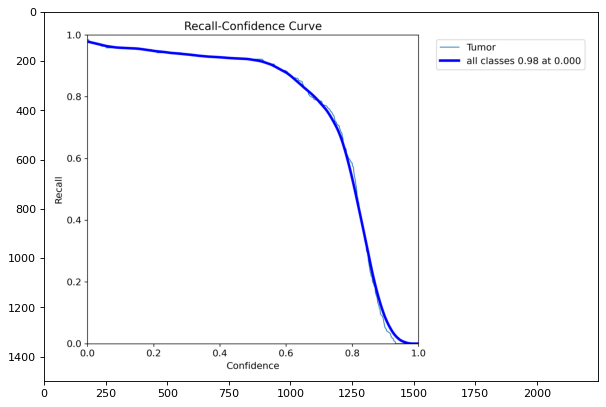

In [24]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/R_curve.png'))

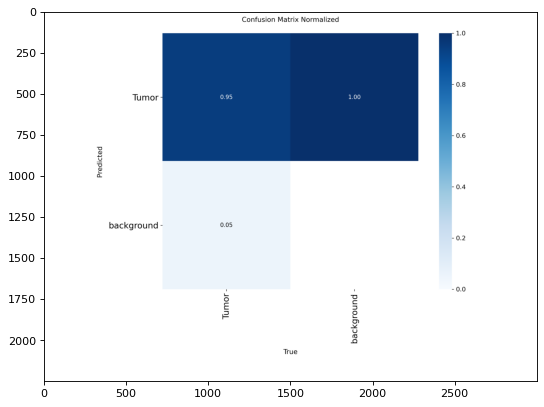

In [25]:
plt.figure(figsize=(10,6), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/confusion_matrix_normalized.png'))

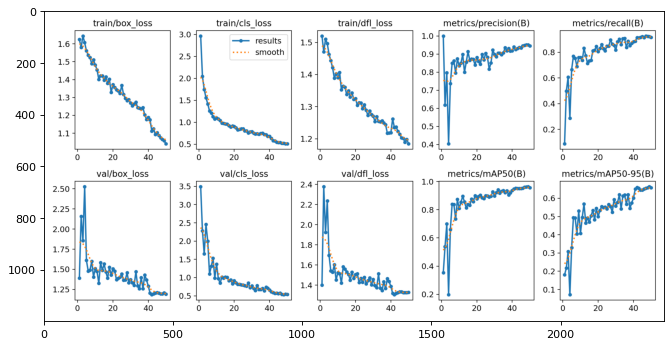

In [28]:
plt.figure(figsize=(10,14 ), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train/results.png'))


image 1/1 /content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg: 640x640 1 Tumor, 28.4ms
Speed: 2.6ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


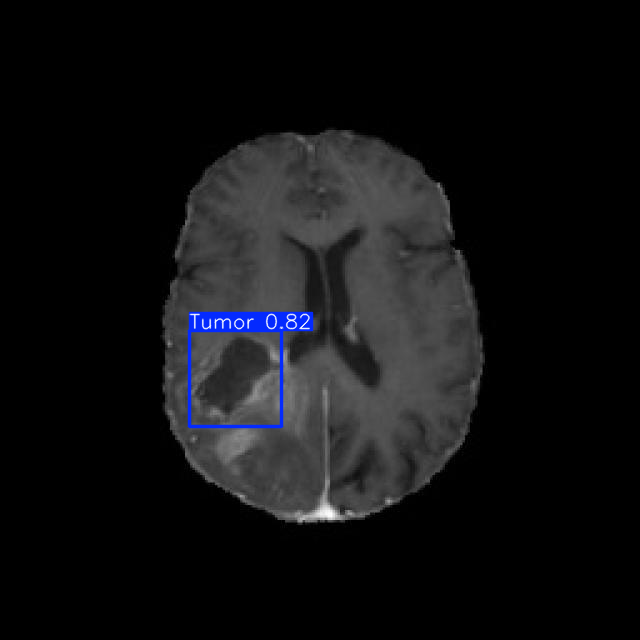

In [29]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg', conf=0.25, save=True)
result[0].show()


image 1/123 /content/MRI-Tumor-Detection-2/test/images/00022_75_jpg.rf.eed25cdeb6281735fd8f0b1ecd30348b.jpg: 640x640 1 Tumor, 18.1ms
image 2/123 /content/MRI-Tumor-Detection-2/test/images/00053_277_jpg.rf.bdd396c5f346ac88829c6a368c29429e.jpg: 640x640 1 Tumor, 14.2ms
image 3/123 /content/MRI-Tumor-Detection-2/test/images/00088_136_jpg.rf.f3bd4f36a97269bbfc4cf9d58d9ea383.jpg: 640x640 1 Tumor, 13.7ms
image 4/123 /content/MRI-Tumor-Detection-2/test/images/00095_200_jpg.rf.7f4ff2787a316bed6ebd039b2c7e91c8.jpg: 640x640 1 Tumor, 15.4ms
image 5/123 /content/MRI-Tumor-Detection-2/test/images/00095_212_jpg.rf.5d89ce3bb547a42a522afa51d515f060.jpg: 640x640 1 Tumor, 14.0ms
image 6/123 /content/MRI-Tumor-Detection-2/test/images/00095_224_jpg.rf.c533024536aec7c31f8a83f4958b1369.jpg: 640x640 1 Tumor, 14.0ms
image 7/123 /content/MRI-Tumor-Detection-2/test/images/00095_226_jpg.rf.7b7e625c2fe6999ca4f242371b9d3cf2.jpg: 640x640 1 Tumor, 13.9ms
image 8/123 /content/MRI-Tumor-Detection-2/test/images/00097_6

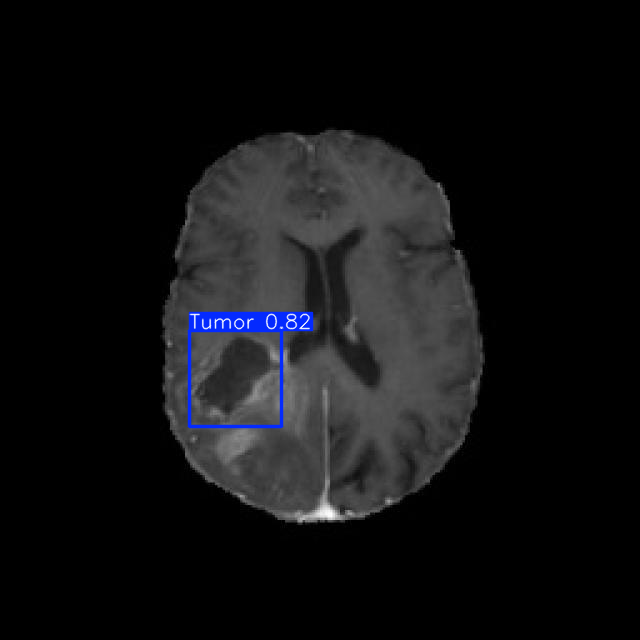

In [30]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/MRI-Tumor-Detection-2/test/images', conf=0.25, save=True)
result[0].show()

In [47]:
import glob
import matplotlib.pyplot as plt

def read_images_from_folder(folder, img_ext):
  images = []

  # Corrected: Call glob.glob directly
  for filename in glob.glob(f"{folder}/*.{img_ext}"):
    img = plt.imread(filename)
    if img is not None:
      images.append(img)
  return images

def sample_images9(images):
  sample = []
  for i in range(25):
    # Corrected a typo in append
    sample.append(images[i])
  return sample

def show_images(images):
  fig = plt.figure(figsize=(6,5))
  columns = 5
  rows = 5
  for i in range(1, columns*rows + 1):
    # Corrected index: Use i-1 to access list elements starting from 0
    img = images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img) # Pass the image to imshow
    plt.axis('off')
  plt.show()

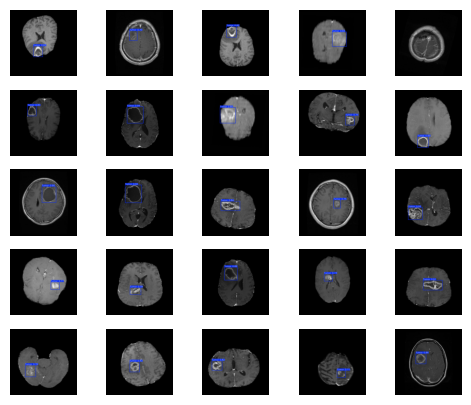

In [48]:
images_val = read_images_from_folder('/content/runs/detect/predict5','jpg')
sample_images = sample_images9(images_val)
show_images(sample_images)